In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df= pd.read_csv('drive/MyDrive/ta1/new1.csv', index_col=0, parse_dates=True, skipinitialspace=True)

In [ ]:
df = df.drop(['KursTengah', 'KursJual2'], axis=1)

In [ ]:
df.head()

,KursJual,KursBeli,KursTgh
Date,,,
2013-01-02,9733,9637,9685
2013-01-03,9718,9622,9670
2013-01-04,9723,9627,9675
2013-01-05,9744,9648,9696
2013-01-06,9766,9668,9717


Korelasi Spearman

In [ ]:
from scipy.stats import spearmanr

correlation_1, p_value_1 = spearmanr(df['KursJual'], df['KursBeli'])
correlation_2, p_value_2 = spearmanr(df['KursJual'], df['KursTgh'])
correlation_3, p_value_3 = spearmanr(df['KursBeli'], df['KursTgh'])

# Output korelasi dan p-value untuk setiap pasangan variabel
print("Korelasi KursJual dan KursBeli:", correlation_1)
print("P-Value KursJual dan KursBeli:", p_value_1)
print("\nKorelasi KursJual dan KursTgh:", correlation_2)
print("P-Value KursJual dan KursTgh:", p_value_2)
print("\nKorelasi KursBeli dan KursTgh:", correlation_3)
print("P-Value KursBeli dan KursTgh:", p_value_3)

Korelasi KursJual dan KursBeli: 0.9999998621573775
P-Value KursJual dan KursBeli: 0.0

Korelasi KursJual dan KursTgh: 0.9999999223650846
P-Value KursJual dan KursTgh: 0.0

Korelasi KursBeli dan KursTgh: 0.9999999462449334
P-Value KursBeli dan KursTgh: 0.0


In [ ]:
df.head()

,KursJual,KursBeli,KursTgh
Date,,,
2013-01-02,9733,9637,9685
2013-01-03,9718,9622,9670
2013-01-04,9723,9627,9675
2013-01-05,9744,9648,9696
2013-01-06,9766,9668,9717


In [ ]:
correlation_matrix, p_value_matrix = spearmanr(df)

# Menampilkan matrix korelasi
print("Matrix Korelasi:")
print(correlation_matrix)


Matrix Korelasi:
[[1.         0.99999986 0.99999992]
 [0.99999986 1.         0.99999995]
 [0.99999992 0.99999995 1.        ]]


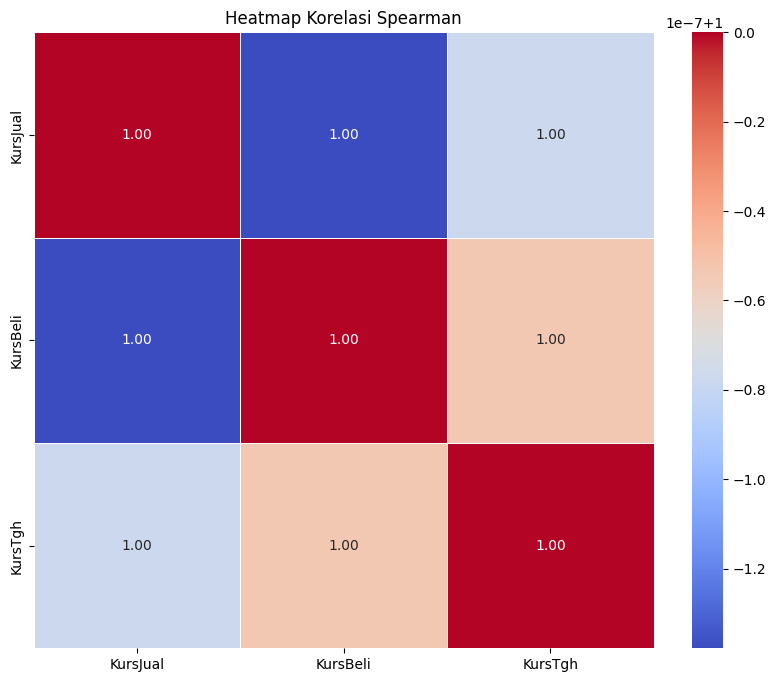

In [ ]:
import seaborn as sns
correlation_matrix = df.corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Spearman')
plt.show()

Visualisasi

In [ ]:
import matplotlib.dates as mdates
df['Date'] = pd.to_datetime(df['Date'])

# Memilih kolom 'Date' dan 'KursBeli', dan mengelompokkannya berdasarkan tanggal sambil menjumlahkannya
df_TotalDay = df[['Date', 'KursBeli']].copy(deep=True)
df_TotalDay = df_TotalDay.groupby('Date').sum()

# Membuat plot
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_TotalDay.index, df_TotalDay['KursBeli'], label='Kurs Beli')

# Menetapkan format tanggal pada sumbu x
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Grafik Kurs Beli per Data per Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Kurs Beli')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: ignored

In [ ]:
import matplotlib.dates as mdates
df['Date'] = pd.to_datetime(df['Date'])

# Memilih kolom 'Date' dan 'KursBeli', dan mengelompokkannya berdasarkan tanggal sambil menjumlahkannya
df_TotalDay = df[['Date', 'KursTgh']].copy(deep=True)
df_TotalDay = df_TotalDay.groupby('Date').sum()

# Membuat plot
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_TotalDay.index, df_TotalDay['KursTgh'], label='Kurs Tengah')

# Menetapkan format tanggal pada sumbu x
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Grafik Kurs Tengah per Data per Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Kurs Tengah')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



```
# Ini diformat sebagai kode
```

# Regresi Linear 1 fitur


In [ ]:
X = np.array(df['KursBeli'])
X.shape

(3894,)

In [ ]:
y = np.array(df['KursTgh'])
y = y.reshape(-1,1)
y.shape

(3894, 1)

In [ ]:
n=10
actual_10days_array = np.array(df['KursTgh'])[-n:]
print(actual_10days_array)

[15329 15326 15319 15253 15268 15282 15297 15294 15263 15239]


In [ ]:
scalerX = MinMaxScaler()
X = X.reshape(-1,1)
scalerX.fit(X)
X = scalerX.transform(X)

In [ ]:
scalery = MinMaxScaler()
scalery.fit(y)
y = scalery.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,np.ravel(y_train))

LinearRegression()

In [ ]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MSE Train{0:.5f}'.format(mean_absolute_error(y_train,y_pred_train)))
from sklearn.metrics import mean_squared_error
print('MSE Train{0:.5f}'.format(mean_absolute_error(y_test,y_pred_test)))

MSE Train0.00004
MSE Train0.00004


In [ ]:
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_train,y_pred_train)))
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_test,y_pred_test)))

R21.00000
R21.00000


In [ ]:
# Hitung MSE (Mean Squared Error)
mse = mean_squared_error(y_train,y_pred_train)

# Hitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(rmse)

4.3009092905730995e-05


In [ ]:
y_pred_test2d = y_pred_test.reshape(-1,1)
y_test2d = y_test.reshape(-1,1)

In [ ]:
nilai_prediksitest = scalerX.inverse_transform(y_pred_test2d)
nilai_test = scalerX.inverse_transform(y_test2d)

In [ ]:
y_train2d = y_train.reshape(-1,1)
nilai_train = scalerX.inverse_transform(y_train2d)

In [ ]:
datanew = actual_10days_array.reshape(-1,1)

In [ ]:
sc_Actualarray= MinMaxScaler()
Actual10_scale = sc_Actualarray.fit_transform(datanew)
print(Actual10_scale)

[[1.        ]
 [0.96666667]
 [0.88888889]
 [0.15555556]
 [0.32222222]
 [0.47777778]
 [0.64444444]
 [0.61111111]
 [0.26666667]
 [0.        ]]


In [ ]:
prediction10d = regressor.predict(Actual10_scale)
prediction10d = prediction10d.reshape(-1,1)

In [ ]:
nilai_baru = scalerX.inverse_transform(prediction10d)

In [ ]:
print(nilai_baru)

[[16656.76371916]
 [16421.07951566]
 [15871.14970749]
 [10686.09723049]
 [11864.51824799]
 [12964.37786432]
 [14142.79888182]
 [13907.11467832]
 [11471.71124216]
 [ 9586.23761416]]


In [ ]:
print("Model slope:    ", regressor.coef_[0])
print("Model intercept:", regressor.intercept_)

Model slope:     0.9999329804833115
Model intercept: 3.360403875229956e-05


# Regresi lInear 2 fitur

In [ ]:
X=np.array(df[['KursJual','KursBeli']])
X.shape

(3894, 2)

In [ ]:
y = np.array(df['KursTgh'])
y = y.reshape(-1,1)
y.shape

(3894, 1)

In [ ]:
n=7
actual_10days_array = np.array(df['KursJual'])[-n:]
print(actual_10days_array)

[15329 15344 15358 15373 15370 15339 15315]


In [ ]:
actual_11days_array = np.array(df['KursBeli'])[-n:]
print(actual_10days_array)

[15329 15344 15358 15373 15370 15339 15315]


In [ ]:
scalerX = MinMaxScaler()
scalerX.fit(X)
X = scalerX.transform(X)

In [ ]:
scalery = MinMaxScaler()
scalery.fit(y)
y = scalery.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=42)

In [ ]:
X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE Train{0:.5f}'.format(mean_absolute_error(y_train,y_pred_train)))

print('MAE Train{0:.5f}'.format(mean_absolute_error(y_test,y_pred_test)))

MAE Train0.01449
MAE Train0.01410


In [ ]:
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_train,y_pred_train)))
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_test,y_pred_test)))

R20.99358
R20.99450


In [ ]:
# Hitung MSE (Mean Squared Error)
mse = mean_squared_error(y_test,y_pred_test)

# Hitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(rmse)

0.015055488871882216


In [ ]:
y_pred_test2d = y_pred_test.reshape(-1,1)
y_test2d = y_test.reshape(-1,1)

In [ ]:
nilai_prediksitest = scalery.inverse_transform(y_pred_test2d)
nilai_test = scalery.inverse_transform(y_test2d)

In [ ]:
datanew = actual_10days_array.reshape(-1,1)
datanew1 = actual_11days_array.reshape(-1,1)

In [ ]:
sc_Actualarray= MinMaxScaler()
Actual10_scale = sc_Actualarray.fit_transform(datanew)
Actual11_scale = sc_Actualarray.fit_transform(datanew1)

In [ ]:
features_for_prediction = np.concatenate((Actual10_scale, Actual11_scale), axis=1)


In [ ]:
features_for_prediction.shape
prediction10d = regressor.predict(features_for_prediction)

In [ ]:
nilai_baru = sc_Actualarray.inverse_transform(prediction10d)

In [ ]:
print(nilai_baru)

[[15176.13687865]
 [15190.2453899 ]
 [15204.38225977]
 [15218.49077102]
 [15215.56883505]
 [15185.37549661]
 [15162.00000878]]


In [ ]:
print("Model slope:    ", regressor.coef_[0])
print("Model intercept:", regressor.intercept_)

Model slope:     [0.47281002 0.50116864]
Model intercept: [1.51452662e-07]


# SVR 1 fitur


In [ ]:
X = np.array(df['KursJual'])
X.shape

(3894,)

In [ ]:
y = np.array(df['KursTgh'])
y = y.reshape(-1,1)

In [ ]:
n= 7
actual_10days_array = np.array(df['KursJual'])[-n:]

In [ ]:
scalerX = MinMaxScaler()
X = X.reshape(-1,1)
scalerX.fit(X)
X = scalerX.transform(X)

In [ ]:
scalery = MinMaxScaler()
scalery.fit(y)
y = scalery.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=42)

In [ ]:
kernels = ['linear', 'poly', 'rbf']
C_values = [0.01, 0.1, 1, 10]
epsilon_values = [0.001, 0.01, 0.1, 1]
gamma_values = [1e-4, 1e-3, 1e-2, 1e-1]
degree_values = [2, 3, 4]

In [ ]:
best_scores = {}
best_models = {}
results = {}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

In [ ]:
for kernel in kernels:
    if kernel == 'poly':
        # Gunakan parameter degree untuk kernel polynomial
        param_grid = {'C': C_values, 'degree': degree_values, 'epsilon': epsilon_values, 'gamma': gamma_values}
    else:
        param_grid = {'C': C_values, 'epsilon': epsilon_values, 'gamma': gamma_values}

    model = SVR(kernel=kernel)

    # Inisialisasi TimeSeriesSplit untuk melakukan Time Series Cross-Validation
    #tscv = TimeSeriesSplit(n_splits=5)

    # Inisialisasi GridSearchCV dengan model SVR, param_grid, dan TimeSeriesSplit
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

    # Lakukan Grid Search untuk mencari parameter terbaik
    grid_search.fit(X_train, y_train)

    # Simpan hasil evaluasi untuk setiap kernel dan parameter
    for i, (params, mean_score) in enumerate(zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score'])):
        if kernel not in results:
            results[kernel] = {}
        param_key = '_'.join([f"{key}_{params[key]}" for key in params])
        mae_score = -grid_search.cv_results_['mean_test_score'][i]
        rmse_score = np.sqrt(mean_squared_error(y_train, grid_search.predict(X_train)))
        r2_score_value = r2_score(y_train, grid_search.predict(X_train))
        results[kernel][param_key] = {'MAE': mae_score, 'RMSE': rmse_score, 'R2 Score': r2_score_value}

    # Simpan model terbaik untuk setiap kernel
    best_models[kernel] = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Cari kernel dengan nilai evaluasi terbaik
best_kernel = None
best_score = float('inf')
for kernel, kernel_results in results.items():
    for param_key, scores in kernel_results.items():
        if scores['MAE'] < best_score:
            best_kernel = kernel
            best_score = scores['MAE']

In [ ]:
best_model = best_models[best_kernel]

In [ ]:
# Mencetak kernel terbaik dan parameter terbaik
best_params = best_model.get_params()
best_C = best_params['C']
best_epsilon = best_params['epsilon']
best_gamma = best_params['gamma']
best_degree = best_params['degree'] if 'degree' in best_params else None

print(f"Kernel terbaik: {best_kernel}")
print(f"Parameter terbaik: C={best_C}, epsilon={best_epsilon}, gamma={best_gamma}", end="")
if best_kernel == 'poly':
    print(f", degree={best_degree}")
else:
    print("")

Kernel terbaik: rbf
Parameter terbaik: C=10, epsilon=0.001, gamma=0.01


In [ ]:
# Cari kernel dengan nilai evaluasi terbaik
best_kernel = None
best_score = float('inf')
for kernel, kernel_results in results.items():
    for param_key, scores in kernel_results.items():
        if scores['MAE'] < best_score and kernel == 'poly':  # Ubah kondisi agar hanya memilih kernel 'poly'
            best_kernel = kernel
            best_score = scores['MAE']

# Ambil model terbaik untuk kernel dengan nilai evaluasi terbaik
best_model = best_models[best_kernel]

# Mencetak kernel terbaik dan parameter terbaik hanya jika kernel adalah 'poly'
if best_kernel == 'poly':
    best_params = best_model.get_params()
    best_C = best_params['C']
    best_epsilon = best_params['epsilon']
    best_gamma = best_params['gamma']
    best_degree = best_params['degree']
    print(f"Kernel terbaik: {best_kernel}")
    print(f"Parameter terbaik: C={best_C}, epsilon={best_epsilon}, gamma={best_gamma}, degree={best_degree}")
else:
    print("Kernel terbaik bukan kernel polinomial.")
#Dengan perubahan ini, kode hanya akan mencetak parameter terbaik untuk kernel 'poly'. Jika kernel terbaik adalah 'poly', maka parameter untuk kernel 'poly' akan dicetak. Jika kernel terbaik adalah 'linear' atau 'rbf', maka pesan bahwa kernel terbaik bukan kernel polinomial akan dicetak.



Kernel terbaik: poly
Parameter terbaik: C=10, epsilon=0.001, gamma=0.1, degree=2


In [ ]:
# Cari kernel dengan nilai evaluasi terbaik
best_kernel = None
best_score = float('inf')
for kernel, kernel_results in results.items():
    for param_key, scores in kernel_results.items():
        if scores['MAE'] < best_score and kernel == 'linear':  # Ubah kondisi agar hanya memilih kernel 'linear'
            best_kernel = kernel
            best_score = scores['MAE']

# Ambil model terbaik untuk kernel dengan nilai evaluasi terbaik
best_model = best_models[best_kernel]

# Mencetak kernel terbaik dan parameter terbaik hanya jika kernel adalah 'linear'
if best_kernel == 'linear':
    best_params = best_model.get_params()
    best_C = best_params['C']
    best_epsilon = best_params['epsilon']
    best_gamma = best_params['gamma']
    print(f"Kernel terbaik: {best_kernel}")
    print(f"Parameter terbaik: C={best_C}, epsilon={best_epsilon}, gamma={best_gamma}")
else:
    print("Kernel terbaik bukan kernel linear.")

Kernel terbaik: linear
Parameter terbaik: C=1, epsilon=0.001, gamma=0.0001


In [ ]:
# Prediksi menggunakan model terbaik
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [ ]:
# Denormalisasi hasil prediksi untuk mendapatkan nilai aktual
y_train_actual_denorm = scalery.inverse_transform(y_train)
y_train_pred_denorm = scalery.inverse_transform(y_pred_train.reshape(-1, 1))
y_test_actual_denorm = scalery.inverse_transform(y_test)
y_test_pred_denorm = scalery.inverse_transform(y_pred_test.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MSE Train{0:.5f}'.format(mean_absolute_error(y_train,y_pred_train)))

print('MSE Train{0:.5f}'.format(mean_absolute_error(y_test,y_pred_test)))

MSE Train0.00033
MSE Train0.00034


In [ ]:
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_train,y_pred_train)))
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_test,y_pred_test)))

R21.00000
R21.00000


In [ ]:
# Hitung MSE (Mean Squared Error)
mse = mean_squared_error(y_train,y_pred_train)

# Hitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(rmse)

0.00040487637025582104


In [ ]:
modellin= SVR(kernel= 'linear',C=1,epsilon= 0.001,gamma=0.0001)
modellin.fit(X_train,np.ravel(y_train))

SVR(C=1, epsilon=0.001, gamma=0.0001, kernel='linear')

In [ ]:
y_pred_testlin = modellin.predict(X_test)
y_pred_trainlin = modellin.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MSE Train{0:.5f}'.format(mean_absolute_error(y_train,y_pred_trainlin)))

print('MSE Train{0:.5f}'.format(mean_absolute_error(y_test,y_pred_testlin)))

MSE Train0.00033
MSE Train0.00034


In [ ]:
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_train,y_pred_trainlin)))
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_test,y_pred_testlin)))

R21.00000
R21.00000


In [ ]:
# Hitung MSE (Mean Squared Error)
mse = mean_squared_error(y_test,y_pred_testlin)

# Hitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(rmse)

0.00041777391205921616


In [ ]:
modelpol= SVR(kernel= 'poly',C=10,epsilon= 0.001,gamma=0.1,degree=2)
modelpol.fit(X_train,np.ravel(y_train))

SVR(C=10, degree=2, epsilon=0.001, gamma=0.1, kernel='poly')

In [ ]:
y_pred_testpol = modelpol.predict(X_test)
y_pred_trainpol = modelpol.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MSE Train{0:.5f}'.format(mean_absolute_error(y_train,y_pred_trainpol)))

print('MSE Train{0:.5f}'.format(mean_absolute_error(y_test,y_pred_testpol)))

MSE Train0.02909
MSE Train0.03389


In [ ]:
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_train,y_pred_trainpol)))
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_test,y_pred_testpol)))

R20.87856
R20.86825


In [ ]:
# Hitung MSE (Mean Squared Error)
mse = mean_squared_error(y_train,y_pred_trainpol)

# Hitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(rmse)

0.06662446347944595


In [ ]:
datanew = actual_10days_array.reshape(-1,1)
sc_Actualarray= MinMaxScaler()
Actual10_scale = sc_Actualarray.fit_transform(datanew)
print(Actual10_scale)

[[0.24137931]
 [0.5       ]
 [0.74137931]
 [1.        ]
 [0.94827586]
 [0.4137931 ]
 [0.        ]]


Model lInear

In [ ]:
prediction10d = modellin.predict(Actual10_scale)
prediction10d = prediction10d.reshape(-1,1)

In [ ]:
nilai_baru = scalerX.inverse_transform(prediction10d)

In [ ]:
print(nilai_baru)

[[11409.5427755 ]
 [13253.38363787]
 [14974.30177609]
 [16818.14263847]
 [16449.37446599]
 [12638.77001708]
 [ 9688.62463728]]


model poly


In [ ]:
prediction10pol = modelpol.predict(Actual10_scale)
prediction10pol = prediction10pol.reshape(-1,1)

In [ ]:
nilai_baru1 = scalerX.inverse_transform(prediction10pol)
print(nilai_baru1)

[[12063.50322644]
 [13241.72443685]
 [15083.03758429]
 [17850.48740409]
 [17231.2362563 ]
 [12757.64905583]
 [11705.47011444]]


RBF


In [ ]:
prediction10rbf = best_model.predict(Actual10_scale)
prediction10rbf = prediction10rbf.reshape(-1,1)

In [ ]:
nilai_baru2 = scalerX.inverse_transform(prediction10rbf)
print(nilai_baru2)

[[11409.5427755 ]
 [13253.38363787]
 [14974.30177609]
 [16818.14263847]
 [16449.37446599]
 [12638.77001708]
 [ 9688.62463728]]


# SVR 2 fitur

In [ ]:
X=np.array(df[['KursJual','KursBeli']])
X.shape

(3894, 2)

In [ ]:
y = np.array(df['KursTgh'])
y = y.reshape(-1,1)

In [ ]:
n=7
actual_10days_array = np.array(df['KursJual'])[-n:]
actual_11days_array = np.array(df['KursBeli'])[-n:]

In [ ]:
scalerX = MinMaxScaler()
scalerX.fit(X)
X = scalerX.transform(X)

In [ ]:
scalery = MinMaxScaler()
scalery.fit(y)
y = scalery.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

In [ ]:
kernels = ['linear', 'poly', 'rbf']
C_values = [0.01, 0.1, 1, 10]
epsilon_values = [0.001, 0.01, 0.1, 1]
gamma_values = [1e-4, 1e-3, 1e-2, 1e-1]
degree_values = [2, 3, 4]

In [ ]:
best_scores = {}
best_models = {}
results = {}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

In [ ]:
for kernel in kernels:
    if kernel == 'poly':
        # Gunakan parameter degree untuk kernel polynomial
        param_grid = {'C': C_values, 'degree': degree_values, 'epsilon': epsilon_values, 'gamma': gamma_values}
    else:
        param_grid = {'C': C_values, 'epsilon': epsilon_values, 'gamma': gamma_values}

    model = SVR(kernel=kernel)

    # Inisialisasi TimeSeriesSplit untuk melakukan Time Series Cross-Validation
    #tscv = TimeSeriesSplit(n_splits=5)

    # Inisialisasi GridSearchCV dengan model SVR, param_grid, dan TimeSeriesSplit
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

    # Lakukan Grid Search untuk mencari parameter terbaik
    grid_search.fit(X_train, y_train)

    # Simpan hasil evaluasi untuk setiap kernel dan parameter
    for i, (params, mean_score) in enumerate(zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score'])):
        if kernel not in results:
            results[kernel] = {}
        param_key = '_'.join([f"{key}_{params[key]}" for key in params])
        mae_score = -grid_search.cv_results_['mean_test_score'][i]
        rmse_score = np.sqrt(mean_squared_error(y_train, grid_search.predict(X_train)))
        r2_score_value = r2_score(y_train, grid_search.predict(X_train))
        results[kernel][param_key] = {'MAE': mae_score, 'RMSE': rmse_score, 'R2 Score': r2_score_value}

    # Simpan model terbaik untuk setiap kernel
    best_models[kernel] = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Cari kernel dengan nilai evaluasi terbaik
best_kernel = None
best_score = float('inf')
for kernel, kernel_results in results.items():
    for param_key, scores in kernel_results.items():
        if scores['MAE'] < best_score:
            best_kernel = kernel
            best_score = scores['MAE']

In [ ]:
best_model = best_models[best_kernel]

In [ ]:
# Mencetak kernel terbaik dan parameter terbaik
best_params = best_model.get_params()
best_C = best_params['C']
best_epsilon = best_params['epsilon']
best_gamma = best_params['gamma']
best_degree = best_params['degree'] if 'degree' in best_params else None

print(f"Kernel terbaik: {best_kernel}")
print(f"Parameter terbaik: C={best_C}, epsilon={best_epsilon}, gamma={best_gamma}", end="")
if best_kernel == 'poly':
    print(f", degree={best_degree}")
else:
    print("")

Kernel terbaik: rbf
Parameter terbaik: C=10, epsilon=0.001, gamma=0.01


In [ ]:
# Prediksi menggunakan model terbaik
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MSE Train{0:.5f}'.format(mean_absolute_error(y_train,y_train_pred)))

print('MSE Train{0:.5f}'.format(mean_absolute_error(y_test,y_test_pred)))

MSE Train0.00026
MSE Train0.00027


In [ ]:
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_train,y_train_pred)))
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_test,y_test_pred)))

R21.00000
R21.00000


In [ ]:
# Hitung MSE (Mean Squared Error)
mse = mean_squared_error(y_test,y_test_pred)

# Hitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(rmse)

0.00032798633053222653


In [ ]:
y_pred_test2d = y_test_pred.reshape(-1,1)
y_test2d = y_test.reshape(-1,1)

In [ ]:
nilai_prediksitest = scalery.inverse_transform(y_pred_test2d)
nilai_test = scalery.inverse_transform(y_test2d)

In [ ]:
datanew = actual_10days_array.reshape(-1,1)
datanew1 = actual_11days_array.reshape(-1,1)
print(datanew)

[[15329]
 [15344]
 [15358]
 [15373]
 [15370]
 [15339]
 [15315]]


In [ ]:
sc_Actualarray= MinMaxScaler()
Actual10_scale = sc_Actualarray.fit_transform(datanew)
Actual11_scale = sc_Actualarray.fit_transform(datanew1)


In [ ]:
features_for_prediction = np.concatenate((Actual10_scale, Actual11_scale), axis=1)


In [ ]:
prediction10d = best_model.predict(features_for_prediction)

In [ ]:
prediction10d = prediction10d.reshape(-1,1)

In [ ]:
nilai_baru = sc_Actualarray.inverse_transform(prediction10d)

In [ ]:
print(nilai_baru)

[[15176.47634341]
 [15190.99897672]
 [15205.5180579 ]
 [15219.92527194]
 [15216.9589284 ]
 [15185.98606495]
 [15162.05846179]]


In [ ]:
df.head()

,KursJual,KursBeli,KursTgh
Date,,,
2013-01-02,9733,9637,9685
2013-01-03,9718,9622,9670
2013-01-04,9723,9627,9675
2013-01-05,9744,9648,9696
2013-01-06,9766,9668,9717


In [ ]:
from datetime import datetime, timedelta

# Ambil tanggal terakhir dari indeks dataset

last_date = df.index[-1]

# Hitung tanggal 7 hari ke depan
future_dates = [last_date + timedelta(days=i) for i in range(1, 8)]

# Buat indeks tanggal untuk tanggal-tanggal prediksi
indeks_prediksi = pd.date_range(start=last_date + timedelta(days=1), periods=7, closed='right')
Actual10_scale_reshaped = Actual10_scale.reshape(-1, 1)
Actual11_scale_reshaped = Actual11_scale.reshape(-1, 1)
features_for_prediction1 = np.concatenate((Actual10_scale_reshaped, Actual11_scale_reshaped), axis=1)

# Lakukan prediksi untuk data masa depan (pastikan X_prediksi sesuai)
prediksi_series = best_model.predict(features_for_prediction1)
prediksi_series=prediksi_series.reshape(-1,1)
nilai_baru11 = sc_Actualarray.inverse_transform(prediksi_series)  # Ganti X_prediksi sesuai dengan data input yang benar
nilai_baru11 = nilai_baru11.reshape(-1)

df_prediksi = pd.DataFrame({
    'KursJual': actual_10days_array ,
    'KursBeli': actual_11days_array ,
    'KursTgh': nilai_baru11
}, index=future_dates)
dfs = df.append(df_prediksi)

# Tampilkan DataFrame hasil gabungan
print(dfs)

            KursJual  KursBeli       KursTgh
2013-01-02      9733      9637   9685.000000
2013-01-03      9718      9622   9670.000000
2013-01-04      9723      9627   9675.000000
2013-01-05      9744      9648   9696.000000
2013-01-06      9766      9668   9717.000000
...              ...       ...           ...
2023-09-03     15358     15206  15205.518058
2023-09-04     15373     15220  15219.925272
2023-09-05     15370     15217  15216.958928
2023-09-06     15339     15186  15185.986065
2023-09-07     15315     15162  15162.058462

[3901 rows x 3 columns]


<ipython-input-118-3413d1a59945>:11: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  indeks_prediksi = pd.date_range(start=last_date + timedelta(days=1), periods=7, closed='right')
<ipython-input-118-3413d1a59945>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs = df.append(df_prediksi)


<ipython-input-119-09ef7c435099>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2023 = dfs['2023']


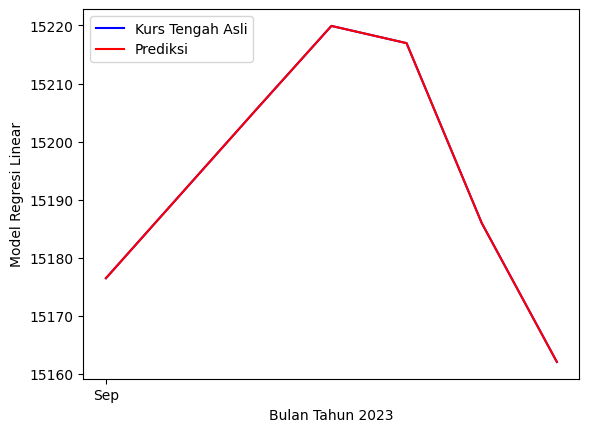

In [ ]:
df_2023 = dfs['2023']

# Ambil data mulai bulan September 2023 ke depan
df_2023_september_onward = df_2023['2023-09-01':]

# Tentukan indeks untuk 7 data terakhir
indeks_7_terakhir = df_2023_september_onward.index[-7:]

# Gabungkan data untuk memastikan indeks terhubung
df_combined = pd.DataFrame({'KursTghAsli': df_2023_september_onward['KursTgh'], 'KursTgh7Terakhir': df_2023_september_onward['KursTgh']})
df_combined['KursTgh7Terakhir'].loc[~df_combined.index.isin(indeks_7_terakhir)] = np.nan

# Visualisasi data asli (warna biru dan merah terhubung)
plt.plot(df_combined.index, df_combined['KursTghAsli'], label='Kurs Tengah Asli', color='blue')

# Visualisasi 7 data terakhir (warna merah)
plt.plot(df_combined.index, df_combined['KursTgh7Terakhir'],
         label='Prediksi',  color='red')

# Format tanggal pada sumbu x menjadi bulan
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Tambahkan label sumbu dan legenda
plt.xlabel('Bulan Tahun 2023')
plt.ylabel('Model Regresi Linear')
plt.legend()

# Tampilkan plot
plt.show()

In [ ]:
modellin= SVR(kernel= 'linear',C=1,epsilon= 0.001,gamma=0.0001)
modellin.fit(X_train,np.ravel(y_train))

SVR(C=1, epsilon=0.001, gamma=0.0001, kernel='linear')

In [ ]:
y_pred_testlin = modellin.predict(X_test)
y_pred_trainlin = modellin.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MSE Train{0:.5f}'.format(mean_absolute_error(y_train,y_pred_trainlin)))

print('MSE Train{0:.5f}'.format(mean_absolute_error(y_test,y_pred_testlin)))

MSE Train0.00033
MSE Train0.00034


In [ ]:
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_train,y_pred_trainlin)))
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_test,y_pred_testlin)))

R21.00000
R21.00000


In [ ]:
# Hitung MSE (Mean Squared Error)
mse = mean_squared_error(y_test,y_pred_testlin)

# Hitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(rmse)

0.0004217950290734145


In [ ]:
modelpol= SVR(kernel= 'poly',C=10,epsilon= 0.001,gamma=0.1,degree=2)
modelpol.fit(X_train,np.ravel(y_train))

SVR(C=10, degree=2, epsilon=0.001, gamma=0.1, kernel='poly')

In [ ]:
y_pred_testpol = modelpol.predict(X_test)
y_pred_trainpol = modelpol.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error
print('MSE Train{0:.5f}'.format(mean_absolute_error(y_train,y_pred_trainpol)))

print('MSE Train{0:.5f}'.format(mean_absolute_error(y_test,y_pred_testpol)))

MSE Train0.02947
MSE Train0.03477


In [ ]:
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_train,y_pred_trainpol)))
from sklearn.metrics import r2_score
print('R2{0:.5f}'.format(r2_score(y_test,y_pred_testpol)))

R20.87971
R20.86619


In [ ]:
# Hitung MSE (Mean Squared Error)
mse = mean_squared_error(y_test,y_pred_testpol)

# Hitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print(rmse)

0.07496240863523441


# Bagian Baru

#